# Data Scrapping using beautiful Soup

- ### Import "Beautiful Soup" 
- ### Make a GET request to fetch Page Data
- ### Parse HTML
- ### Filter relevant parts

# Beautiful Soup is a Python library for pulling data out of HTML and XML files. 

# Installation

- ### pip install bs4

In [27]:
# Aim is to extract the table form the website - https://en.wikipedia.org/wiki/Android version history

from urllib.request import urlopen 

In [28]:
 android_url = "https://en.wikipedia.org/wiki/Android_version_history" 

In [29]:
 # Through this we are sending request to SERVER and demanding the HTTP request of the data
 android_data = urlopen(android_url)
 print(type(android_data)) # This is the type of HTTP response

<class 'http.client.HTTPResponse'>


In [30]:
android_html = android_data.read() # To read the data extracted in the HTML form as the website is made in HtML
print(android_html) # Prints the entire HTML code of the link

ctor-menu vector-menu-portal portal" aria-labelledby="p-coll-print_export-label" role="navigation" \n\t >\n\t<h3 id="p-coll-print_export-label" class="vector-menu-heading">\n\t\t<span>Print/export</span>\n\t</h3>\n\t<div class="vector-menu-content">\n\t\t<ul class="vector-menu-content-list"><li id="coll-download-as-rl"><a href="/w/index.php?title=Special:DownloadAsPdf&amp;page=Android_version_history&amp;action=show-download-screen" title="Download this page as a PDF file">Download as PDF</a></li><li id="t-print"><a href="/w/index.php?title=Android_version_history&amp;printable=yes" title="Printable version of this page [p]" accesskey="p">Printable version</a></li></ul>\n\t\t\n\t</div>\n</nav>\n<nav id="p-wikibase-otherprojects" class="mw-portlet mw-portlet-wikibase-otherprojects vector-menu vector-menu-portal portal" aria-labelledby="p-wikibase-otherprojects-label" role="navigation" \n\t >\n\t<h3 id="p-wikibase-otherprojects-label" class="vector-menu-heading">\n\t\t<span>In other proj

### AS WE INITIATED TH CONNECTION WITH THE SERVER, WE NEED TO CLOSE THE CONNECTION

In [31]:
android_data.close() # AS we read the lisnk through android_data

# PARSING DATA

In [32]:
from bs4 import BeautifulSoup as soup 

### Beautified version of the above html

In [34]:
android_soup = soup(android_html,'html.parser') # 1st argument is what you want to parse   2nd argument is in what form you want to parse
print(android_soup) 

Main_Page" title="Visit the main page [z]">Main page</a></li><li id="n-contents"><a href="/wiki/Wikipedia:Contents" title="Guides to browsing Wikipedia">Contents</a></li><li id="n-currentevents"><a href="/wiki/Portal:Current_events" title="Articles related to current events">Current events</a></li><li id="n-randompage"><a accesskey="x" href="/wiki/Special:Random" title="Visit a randomly selected article [x]">Random article</a></li><li id="n-aboutsite"><a href="/wiki/Wikipedia:About" title="Learn about Wikipedia and how it works">About Wikipedia</a></li><li id="n-contactpage"><a href="//en.wikipedia.org/wiki/Wikipedia:Contact_us" title="How to contact Wikipedia">Contact us</a></li><li id="n-sitesupport"><a href="https://donate.wikimedia.org/wiki/Special:FundraiserRedirector?utm_source=donate&amp;utm_medium=sidebar&amp;utm_campaign=C13_en.wikipedia.org&amp;uselang=en" title="Support us by donating to the Wikimedia Foundation">Donate</a></li></ul>
</div>
</nav>
<nav aria-labelledby="p-int

In [35]:
print(type(android_soup))

<class 'bs4.BeautifulSoup'>


In [36]:
android_soup.h1 # Heading of the page

<h1 class="firstHeading" id="firstHeading">Android version history</h1>

In [15]:
android_soup.findAll('h1',{})  # findAll returns list of all 'h1' headings

[<h1 class="firstHeading" id="firstHeading">Android version history</h1>]

## Now we want to extract table from HTML which may be present in
- table tags
- class table in HTML

So we have to look for both the things from HTML from Chrome

In [41]:
# Here we found the table tag with its 'class tag' - Used to differentiate between different tables

# 1st argument is the tag of what you want to find
# 2nd argument is the dictionary of the class and id
tables = android_soup.findAll('table', {"class":"wikitable"}) # Write 'id':'xyz' -> if id is written  ------- <table class='wikitable'>..............</table> 
print(len(tables))

31


In [19]:
# There are 31 such tables, but we want 1st
android_table = tables[0]
print(android_table) # Andriod table is the first table

<table class="wikitable mw-collapsible" style="width:100%;">
<tbody><tr>
<th colspan="3" style="background:#e9e9e9; text-align:center;">Android 1.0 (API 1)
</th></tr>
<tr style="vertical-align:top;">
<th colspan="3" style="text-align: left; font-weight: normal !important;">Android 1.0, the first commercial version of the software, was released on September 23, 2008.<sup class="reference" id="cite_ref-14"><a href="#cite_note-14">[14]</a></sup> The first commercially available Android device was the <a href="/wiki/HTC_Dream" title="HTC Dream">HTC Dream</a>.<sup class="reference" id="cite_ref-HTC_15-0"><a href="#cite_note-HTC-15">[15]</a></sup> Android 1.0 incorporated the following features:
</th></tr>
<tr>
<th style="background:#e9e9e9; width:5%; text-align:center;">Version
</th>
<th style="background:#e9e9e9; width:10%; text-align:center;"><span class="nowrap">Release date</span>
</th>
<th style="background:#e9e9e9; width:70%; text-align:center;">Features
</th></tr>
<tr style="vertical

# Extracting useful info 
- remove undesired tags
- extract table header and data

### extract table header

In [20]:
# Go to chrome inspector and see the HTML and you will find all the headers are in 'th'tag

headers = android_table.findAll('th')
print(len(headers)) 

5


In [21]:
headers[0]

<th colspan="3" style="background:#e9e9e9; text-align:center;">Android 1.0 (API 1)
</th>

In [22]:
headers[0].text

'Android 1.0 (API 1)\n'

In [23]:
print(headers[0].text)

Android 1.0 (API 1)



In [24]:
column_titles = [ct.text for ct in headers]
print(column_titles)

['Android 1.0 (API 1)\n', 'Android 1.0, the first commercial version of the software, was released on September 23, 2008.[14] The first commercially available Android device was the HTC Dream.[15] Android 1.0 incorporated the following features:\n', 'Version\n', 'Release date\n', 'Features\n']


In [42]:
column_titles = [ct.text[:-1] for ct in headers] # Slicing to remove '\n' 
print(column_titles)

['Android 1.0 (API 1)', 'Android 1.0, the first commercial version of the software, was released on September 23, 2008.[14] The first commercially available Android device was the HTC Dream.[15] Android 1.0 incorporated the following features:', 'Version', 'Release date', 'Features']


### Extract the row data

In [45]:
rows_data = android_table.findAll('tr') # WE can also do slicing of rows_data is we want data only after the last row - rows_data = "android_table.findAll('tr')[3:]"
print(len(rows_data))
print(rows_data)

4
[<tr>
<th colspan="3" style="background:#e9e9e9; text-align:center;">Android 1.0 (API 1)
</th></tr>, <tr style="vertical-align:top;">
<th colspan="3" style="text-align: left; font-weight: normal !important;">Android 1.0, the first commercial version of the software, was released on September 23, 2008.<sup class="reference" id="cite_ref-14"><a href="#cite_note-14">[14]</a></sup> The first commercially available Android device was the <a href="/wiki/HTC_Dream" title="HTC Dream">HTC Dream</a>.<sup class="reference" id="cite_ref-HTC_15-0"><a href="#cite_note-HTC-15">[15]</a></sup> Android 1.0 incorporated the following features:
</th></tr>, <tr>
<th style="background:#e9e9e9; width:5%; text-align:center;">Version
</th>
<th style="background:#e9e9e9; width:10%; text-align:center;"><span class="nowrap">Release date</span>
</th>
<th style="background:#e9e9e9; width:70%; text-align:center;">Features
</th></tr>, <tr style="vertical-align:top;">
<td>1.0
</td>
<td>September 23, 2008
</td>
<td>


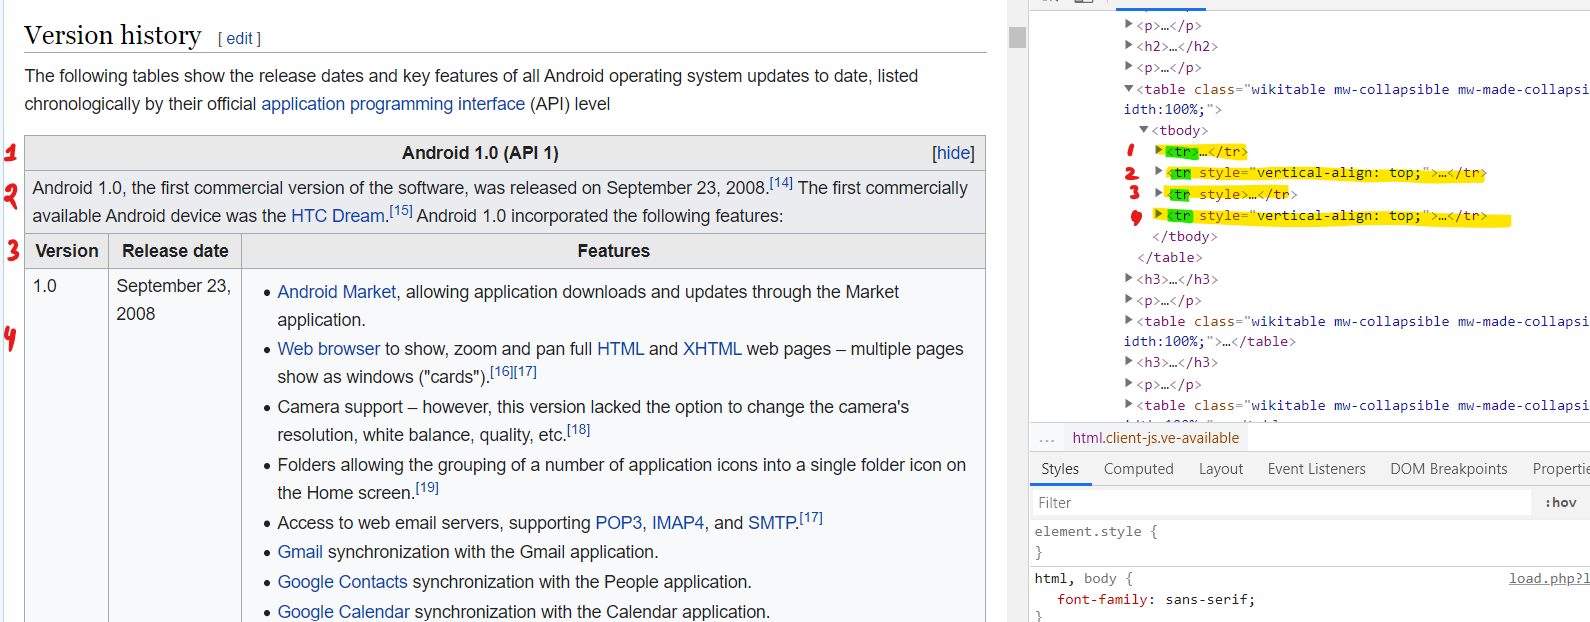

In [46]:
from IPython import display
display.Image("img1.png")

In [44]:
first_row = rows_data[0]
print(first_row)

<tr>
<th colspan="3" style="background:#e9e9e9; text-align:center;">Android 1.0 (API 1)
</th></tr>


In [47]:
third_row = rows_data[3].findAll('td', {})
for d in third_row:
    print(d)

<td>1.0
</td>
<td>September 23, 2008
</td>
<td>
<ul><li><a class="mw-redirect" href="/wiki/Android_Market" title="Android Market">Android Market</a>, allowing application downloads and updates through the Market application.</li>
<li><a href="/wiki/Web_browser" title="Web browser">Web browser</a> to show, zoom and pan full <a href="/wiki/HTML" title="HTML">HTML</a> and <a href="/wiki/XHTML" title="XHTML">XHTML</a> web pages – multiple pages show as windows ("cards").<sup class="reference" id="cite_ref-Engadget_16-0"><a href="#cite_note-Engadget-16">[16]</a></sup><sup class="reference" id="cite_ref-Release_features_–_Android_1.0_17-0"><a href="#cite_note-Release_features_–_Android_1.0-17">[17]</a></sup></li>
<li>Camera support – however, this version lacked the option to change the camera's resolution, white balance, quality, etc.<sup class="reference" id="cite_ref-T-Mobile_G1_Google_Android_Phone_18-0"><a href="#cite_note-T-Mobile_G1_Google_Android_Phone-18">[18]</a></sup></li>
<li>Fol

In [50]:
for d in third_row:
    print(d.text) # Text only shows the text removing the tags
    # We can also do slicing for removing \n -------- print(d.text[:-1])

1.0

September 23, 2008


Android Market, allowing application downloads and updates through the Market application.
Web browser to show, zoom and pan full HTML and XHTML web pages – multiple pages show as windows ("cards").[16][17]
Camera support – however, this version lacked the option to change the camera's resolution, white balance, quality, etc.[18]
Folders allowing the grouping of a number of application icons into a single folder icon on the Home screen.[19]
Access to web email servers, supporting POP3, IMAP4, and SMTP.[17]
Gmail synchronization with the Gmail application.
Google Contacts synchronization with the People application.
Google Calendar synchronization with the Calendar application.
Google Maps with Street View to view maps and satellite imagery, as well as find local businesses and obtain driving directions using GPS.[18]
Google Sync, allowing management of over-the-air synchronization of Gmail, People, and Calendar.
Google Search, allowing users to search the Inte

In [56]:
# WE can also show all the rows

table_rows = []
for row in rows_data:
    current_row = []
    row_data = row.findAll('td', {}) # Above is rows_data ------ In this we are storing the info of each row one by one
    # for idx,data in enumerate(row_data):
    #     if idx!=0 and idx!=3:
    #         current_row.append(data.text[:-1]) # To remove \n
    #     else:
    #         current_row.append(data.text) # To remove \n
        
    
    # This is same as above two commented lines BUT ABOVE CODE WILL BE USED WHEN WE HAVE INFO REGARDING WHERE TO PUT '\N' AND WHERE NOT
    for data in row_data:
        current_row.append(data.text) # To remove \n
    
    print(current_row)
    print()

    table_rows.append(current_row)

# First 3 are empty in the output as they are the headers and headers do not include 'td'

[]

[]

[]

['1.0\n', 'September 23, 2008\n', '\nAndroid Market, allowing application downloads and updates through the Market application.\nWeb browser to show, zoom and pan full HTML and XHTML web pages – multiple pages show as windows ("cards").[16][17]\nCamera support – however, this version lacked the option to change the camera\'s resolution, white balance, quality, etc.[18]\nFolders allowing the grouping of a number of application icons into a single folder icon on the Home screen.[19]\nAccess to web email servers, supporting POP3, IMAP4, and SMTP.[17]\nGmail synchronization with the Gmail application.\nGoogle Contacts synchronization with the People application.\nGoogle Calendar synchronization with the Calendar application.\nGoogle Maps with Street View to view maps and satellite imagery, as well as find local businesses and obtain driving directions using GPS.[18]\nGoogle Sync, allowing management of over-the-air synchronization of Gmail, People, and Calendar.\nGoogle Search,

# Writing and reading CSV Files

In [60]:
filename = 'android_version_history.csv'

with open(filename,'w') as f: # This will also make a file
    # Write header
    header_string = ",".join(column_titles)
    header_string += '\n' # To start the other data from the next line
    f.write(header_string)

    # Inserting rows
    for row in table_rows:
        row_string = "" # So that every time a new row is made
        for w in row:
            w = w.replace(',' , '') # To remove commas if they appear anywhere in the data
            row_string += w+','
        
        row_string += '\n'
        f.write(row_string)

# File is not in the good quality because we have not done slicing above ( BUT WE HAVE SEEN THE IDEA IN THE COMMENTED CODE)

# Cleaning data
- Removing undesired commands and symbols
- Undesired info

For this we have to apply slicing on the 2nd above block from this

# Loading Local Files
- How we can open local files

In [63]:
# Save the android page locally
with open('Android.html', encoding = 'utf-8') as f:
    page_soup = soup(f,'html.parser')

In [64]:
page_soup.findAll('h1')

[<h1 class="firstHeading" id="firstHeading">Android version history</h1>]

In [65]:
page_soup.findAll('table') # This gives all the tables from the local web page

nslate</a>
 <ul><li><i><a href="https://en.wikipedia.org/wiki/Google_Translator_Toolkit" title="Google Translator Toolkit">Translator Toolkit</a></i></li></ul></li>
 <li><a href="https://en.wikipedia.org/wiki/Google_Voice" title="Google Voice">Voice</a></li>
 <li><i><a class="mw-redirect" href="https://en.wikipedia.org/wiki/Apache_Wave" title="Apache Wave">Wave</a></i></li></ul>
 </div></td></tr><tr><th class="navbox-group" scope="row" style="width:1%"><a href="https://en.wikipedia.org/wiki/Google_Search" title="Google Search">Search</a></th><td class="navbox-list navbox-even" style="text-align:left;border-left-width:2px;border-left-style:solid;width:100%;padding:0px"><div style="padding:0em 0.25em">
 <ul><li><i><a href="https://en.wikipedia.org/wiki/Aardvark_(search_engine)" title="Aardvark (search engine)">Aardvark</a></i></li>
 <li><a href="https://en.wikipedia.org/wiki/Google_Alerts" title="Google Alerts">Alerts</a></li>
 <li><i><a href="https://en.wikipedia.org/wiki/Google_Answers